In [118]:
import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
#Reading the Dataset
df = pd.read_csv("train.csv")

In [78]:
#Displaying the first 10 rows of the dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- **Passenger ID** - *To identify unique passengers*  
- **Survived** - *If they survived or not (0 = Dead, 1 = Alive)*  
- **P Class** - *The class passengers travelled in*  
- **Name** - *Passenger Name*  
- **Sex** - *Gender of Passenger*  
- **Age** - *Age of Passenger*  
- **SibSp** - *Number of siblings or spouse*  
- **Parch** - *Parent or child*  
- **Ticket** - *Ticket number*  
- **Fare** - *Amount paid for the ticket*  
- **Cabin** - *Cabin of residence*  
- **Embarked** - *Point of embarkment (C = Cherbourg; Q = Queenstown; S = Southampton)*  
outhampton)uthampton)

In [80]:
#Size of the Dataset
print(df.shape)

(891, 12)


In [81]:
#Datatypes of the each coulmns 
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [82]:
#complete information of the dataset with Null count 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [83]:
#Description of the Dataset with Count, Mean, Min, Max Values
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [84]:
#finding the percentage of Males and Females as per the Dataset 

perc_gender = ((df['Sex'].value_counts())/len(df))*100
print(perc_gender)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


In [85]:
#Finding the percentage of people Survived
perc_survived = ((df['Survived'].value_counts())/len(df))*100
print(perc_survived)

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64


In [86]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [87]:
# Fill missing age with Median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [88]:
#Filling the missing Embarked values with Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [126]:
# Encode categorical data
label_encoder = LabelEncoder()
for col in ['Sex', 'Embarked']:
    df[col] = label_encoder.fit_transform(df[col])
print(df['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


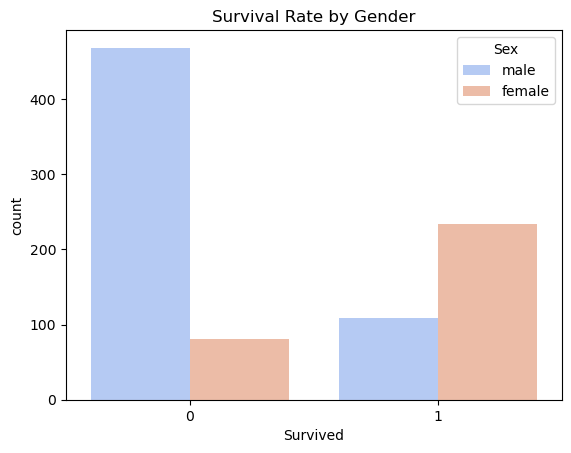

In [89]:
#Below graph shows survival rate by Gender 
sns.countplot(x='Survived', hue='Sex', data=df, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.show()


<Axes: xlabel='Pclass', ylabel='count'>

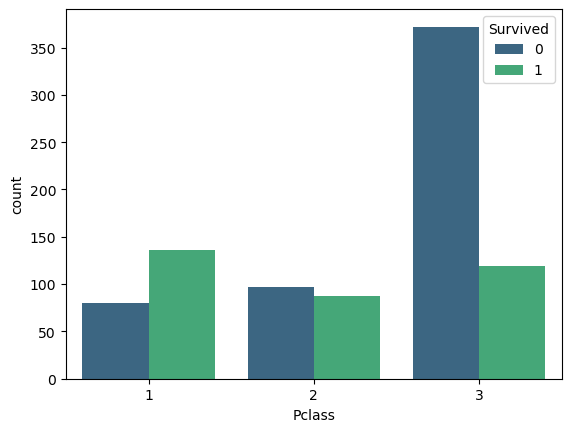

In [90]:
#Below graph shows the survival rate of the people based on the class that they are travelling
sns.countplot(x = 'Pclass', hue = 'Survived', data = df, palette = 'viridis')

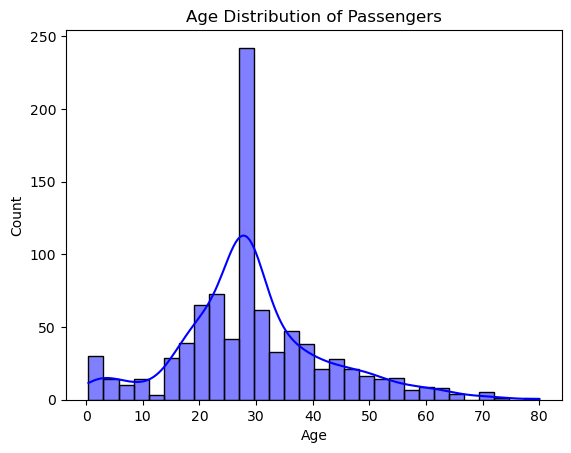

In [110]:
#Below graphs shows the age range of the Passengers in the Titanic

sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


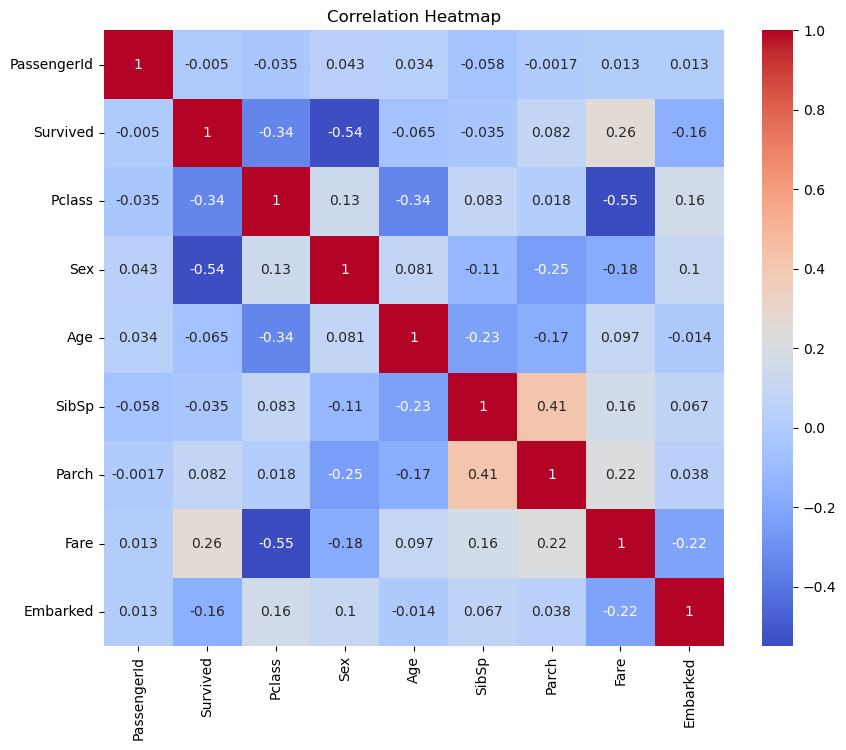

In [134]:
#Heatmap for the Dataset

plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [128]:
# Select features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [146]:
#Accuracy of the Data
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8268156424581006


In [148]:
#Classification Report 
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



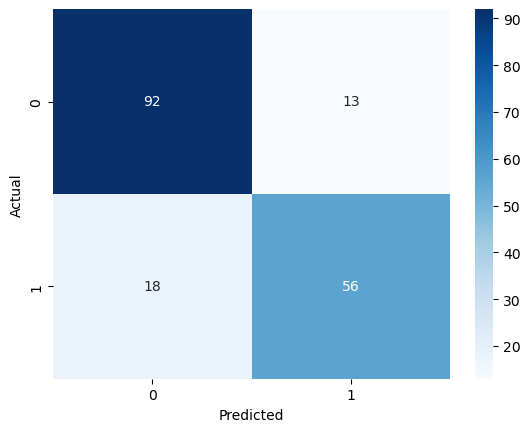

In [144]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
